In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def model(X, w_h, w_o):
    h = tf.nn.sigmoid(tf.matmul(X, w_h)) # input 784, output 625
    return tf.matmul(h, w_o) # input 625, output 10

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX = mnist.train.images
trY = mnist.train.labels
teX = mnist.test.images
teY = mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# def init_weights(shape):
#     return tf.Variable(tf.random_normal(shape, stddev=0.01))

# def model(X, w_h, w_o):
#     h = tf.nn.sigmoid(tf.matmul(X, w_h)) # this is a basic mlp, think 2 stacked logistic regressions
#     return tf.matmul(h, w_o) # note that we dont take the softmax at the end because our cost fn does that for us

# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
X = tf.placeholder("float", [None, 784])
Y = tf.placeholder("float", [None, 10])
w_h = init_weights([784, 625])
w_o = init_weights([625, 10])
py_x = model(X, w_h, w_o)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=py_x, labels=Y))
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)
predict_op = tf.argmax(py_x, 1)

In [4]:
# X = tf.placeholder("float", [None, 784])
# Y = tf.placeholder("float", [None, 10])

# w_h = init_weights([784, 625]) # create symbolic variables
# w_o = init_weights([625, 10])

# py_x = model(X, w_h, w_o)

# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=py_x, labels=Y)) # compute costs
# train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost) # construct an optimizer
# predict_op = tf.argmax(py_x, 1)

In [5]:
import matplotlib.pyplot as plt

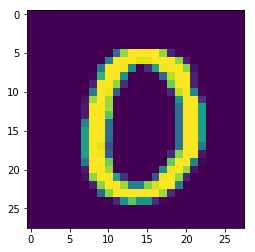

In [6]:
plt.imshow(np.reshape(trX[10], [28, 28]))

In [7]:
# plt.imshow(np.reshape(trX[10], [28,28]))

In [9]:
# illustration of the batching mechanism
print('Total length of trX', len(trX))
for start, end in zip(range(0, len(trX), 128), range(128, len(trX)+1, 128)):
    print('Start index:', start, '| End index:', end)

Total length of trX 55000
Start index: 0 | End index: 128
Start index: 128 | End index: 256
Start index: 256 | End index: 384
Start index: 384 | End index: 512
Start index: 512 | End index: 640
Start index: 640 | End index: 768
Start index: 768 | End index: 896
Start index: 896 | End index: 1024
Start index: 1024 | End index: 1152
Start index: 1152 | End index: 1280
Start index: 1280 | End index: 1408
Start index: 1408 | End index: 1536
Start index: 1536 | End index: 1664
Start index: 1664 | End index: 1792
Start index: 1792 | End index: 1920
Start index: 1920 | End index: 2048
Start index: 2048 | End index: 2176
Start index: 2176 | End index: 2304
Start index: 2304 | End index: 2432
Start index: 2432 | End index: 2560
Start index: 2560 | End index: 2688
Start index: 2688 | End index: 2816
Start index: 2816 | End index: 2944
Start index: 2944 | End index: 3072
Start index: 3072 | End index: 3200
Start index: 3200 | End index: 3328
Start index: 3328 | End index: 3456
Start index: 3456 |

In [ ]:
# # Launch the graph in a session
# with tf.Session() as sess:
#     # you need to initialize all variables
#     tf.global_variables_initializer().run()

#     for i in range(100):
#         for start, end in zip(range(0, len(trX), 128), range(128, len(trX)+1, 128)):
#             sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})
#         if i % 10 == 0:
#             # print(sess.run(predict_op, feed_dict={X: teX}))
#             print(i, np.mean(np.argmax(teY, axis=1) == sess.run(predict_op, feed_dict={X: teX})))

0 0.6862
10 0.9073
20 0.9186
30 0.9229
40 0.9272
50 0.9323
60 0.9393
70 0.9431
80 0.9484
90 0.952


In [33]:
# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize all variables
    tf.global_variables_initializer().run()

    for i in range(100):
        for start, end in zip(range(0, len(trX), 128), range(128, len(trX)+1, 128)):
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})
        if i % 10 == 0:
            # predictions by the network vs the labels or 'truth'
            print('Predictions:', sess.run(predict_op, feed_dict={X: teX}))
            print('Ground truth:', np.argmax(teY, axis=1))
            # compare both 
            print('Comparison:', np.argmax(teY, axis=1) == sess.run(predict_op, feed_dict={X: teX}))
            # take the mean of 0s or 1s for all predictions/labels comparisons 
            # -> the overall accuracy of the network
            print('Accuracy:', i, np.mean(np.argmax(teY, axis=1) == sess.run(predict_op, feed_dict={X: teX})))
            print('-'*30)

Predictions: [7 2 1 ... 4 6 6]
Ground truth: [7 2 1 ... 4 5 6]
Comparison: [ True  True  True ...  True False  True]
Accuracy: 0 0.6956
------------------------------
Predictions: [7 2 1 ... 4 5 6]
Ground truth: [7 2 1 ... 4 5 6]
Comparison: [ True  True  True ...  True  True  True]
Accuracy: 10 0.9086
------------------------------
Predictions: [7 2 1 ... 4 5 6]
Ground truth: [7 2 1 ... 4 5 6]
Comparison: [ True  True  True ...  True  True  True]
Accuracy: 20 0.919
------------------------------
Predictions: [7 2 1 ... 4 5 6]
Ground truth: [7 2 1 ... 4 5 6]
Comparison: [ True  True  True ...  True  True  True]
Accuracy: 30 0.9228
------------------------------
Predictions: [7 2 1 ... 4 5 6]
Ground truth: [7 2 1 ... 4 5 6]
Comparison: [ True  True  True ...  True  True  True]
Accuracy: 40 0.9277
------------------------------
Predictions: [7 2 1 ... 4 5 6]
Ground truth: [7 2 1 ... 4 5 6]
Comparison: [ True  True  True ...  True  True  True]
Accuracy: 50 0.9341
-------------------------

Iteration: 0 | Accuracy:  0.6878
Iteration: 10 | Accuracy:  0.9076
Iteration: 20 | Accuracy:  0.9186
Iteration: 30 | Accuracy:  0.9228
Iteration: 40 | Accuracy:  0.9276
Iteration: 50 | Accuracy:  0.9335
Iteration: 60 | Accuracy:  0.9386
Iteration: 70 | Accuracy:  0.9426
Iteration: 80 | Accuracy:  0.9482
Iteration: 90 | Accuracy:  0.9526


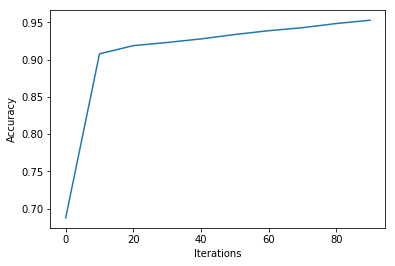

In [29]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    accuracy_over_time = []
    for i in range(100):
        # create indices so we can train on batches of 128 items
        for start, end in zip(range(0, len(trX), 128), range(128, len(trX)+1, 128)):
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})
        if i % 10 == 0:
            # Save accuracy data
            accuracy_over_time.append((i, np.mean(np.argmax(teY, axis=1) == sess.run(predict_op, feed_dict={X: teX}))))
            print('Iteration:', i, '| Accuracy: ', np.mean(np.argmax(teY, axis=1) == sess.run(predict_op, feed_dict={X: teX})))
    plt.figure()
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.plot(*zip(*accuracy_over_time))